<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/MergedDatasetPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import statsmodels.stats.api as sm

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MergedDsP2.csv to MergedDsP2.csv


In [3]:
mg_DS_Actual = pd.read_csv(io.BytesIO(uploaded['MergedDsP2.csv']))
mg_DS_Actual_Copy = mg_DS_Actual.copy()

In [4]:
mg_DS_Actual_Copy.head(10)

,Age,BMI,HighChol,HighBP,Diabetes
0,9,40.0,1.0,1,0
1,7,25.0,0.0,0,0
2,9,28.0,1.0,1,0
3,11,27.0,0.0,1,0
4,11,24.0,1.0,1,0
5,10,25.0,1.0,1,0
6,9,30.0,0.0,1,0
7,11,25.0,1.0,1,0
8,9,30.0,1.0,1,1
9,8,24.0,0.0,0,0


In [5]:
print('==========Info==========')
print(mg_DS_Actual_Copy.info())
print('')
print('==========Check for number of null Values==========')
print(mg_DS_Actual_Copy.isnull().sum())
print('')
print('==========Finding no.of Unique values in each column==========')
print(mg_DS_Actual_Copy.nunique())
print('')
print('==========Description of dataset==========')
print(mg_DS_Actual_Copy.describe())

==========Info==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267744 entries, 0 to 267743
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Age       267744 non-null  int64  
 1   BMI       267744 non-null  float64
 2   HighChol  218672 non-null  float64
 3   HighBP    267744 non-null  int64  
 4   Diabetes  267744 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 10.2 MB
None

==========Check for number of null Values==========
Age             0
BMI             0
HighChol    49072
HighBP          0
Diabetes        0
dtype: int64

==========Finding no.of Unique values in each column==========
Age           14
BMI         2648
HighChol       2
HighBP         2
Diabetes       2
dtype: int64

==========Description of dataset==========
                 Age            BMI       HighChol         HighBP  \
count  267744.000000  267744.000000  218672.000000  267744.000000   
mean        7.689397      27.

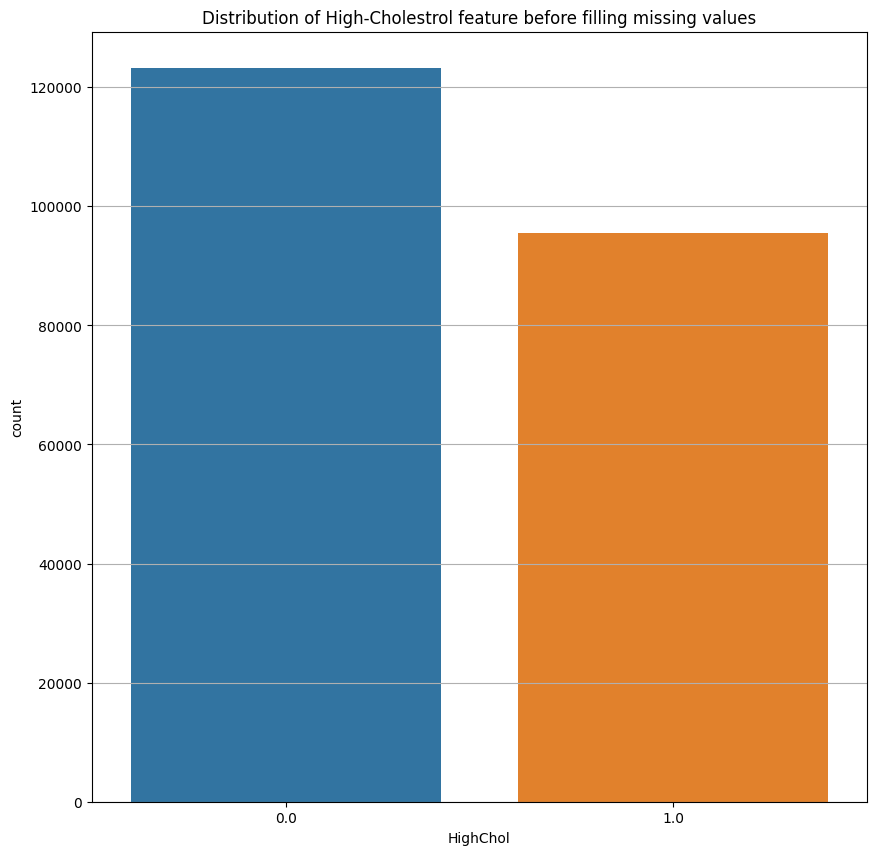

In [6]:
plt.figure(figsize=(10, 10))
sns.countplot(data=mg_DS_Actual_Copy,x='HighChol').yaxis.grid(True)
plt.title('Distribution of High-Cholestrol feature before filling missing values')
plt.show()

In [7]:
missing_feature = 'HighChol'

In [8]:
missing_data = mg_DS_Actual_Copy[mg_DS_Actual_Copy[missing_feature].isna()]
valid_data = mg_DS_Actual_Copy[~mg_DS_Actual_Copy[missing_feature].isna()]

In [9]:
X = valid_data.drop([missing_feature], axis=1)
y = valid_data[missing_feature]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

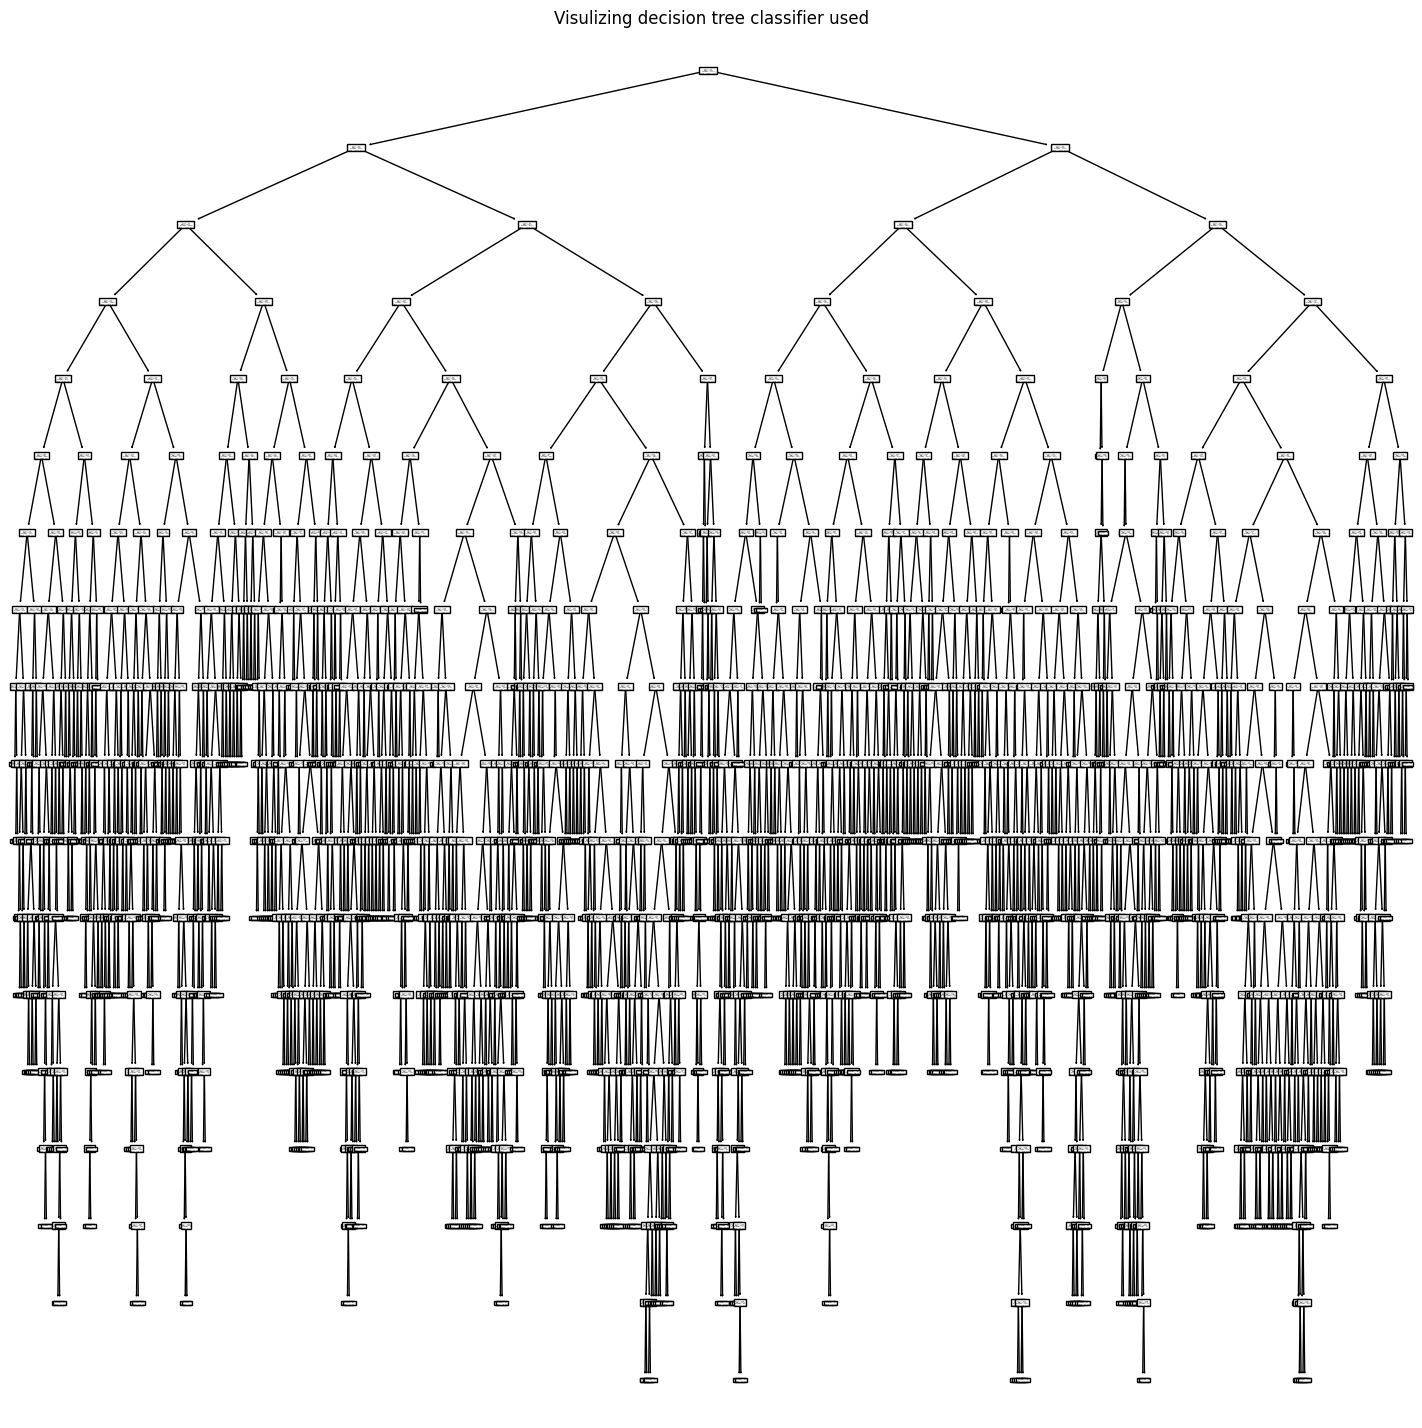

In [13]:
plt.figure(figsize=(18, 18))
plot_tree(clf)
plt.title('Visulizing decision tree classifier used')
plt.show()

In [14]:
predicted_HighChol = clf.predict(missing_data.drop([missing_feature], axis=1))

In [15]:
missing_data[missing_feature] = predicted_HighChol

In [16]:
filled_data = pd.concat([valid_data, missing_data])

In [17]:
print(filled_data.isnull().sum())

Age         0
BMI         0
HighChol    0
HighBP      0
Diabetes    0
dtype: int64


In [18]:
filled_data.to_csv('filled_diabetes_data.csv', index=False)

In [20]:
from google.colab import files
uploaded = files.upload()

Saving filled_diabetes_data (1).csv to filled_diabetes_data (1).csv


In [21]:
fully_merged_dataset = pd.read_csv(io.BytesIO(uploaded['filled_diabetes_data (1).csv']))
fully_merged_dataset_copy = fully_merged_dataset.copy()

In [22]:
fully_merged_dataset_copy.head()

,Age,BMI,HighChol,HighBP,Diabetes
0,9,40.0,1.0,1,0
1,7,25.0,0.0,0,0
2,9,28.0,1.0,1,0
3,11,27.0,0.0,1,0
4,11,24.0,1.0,1,0


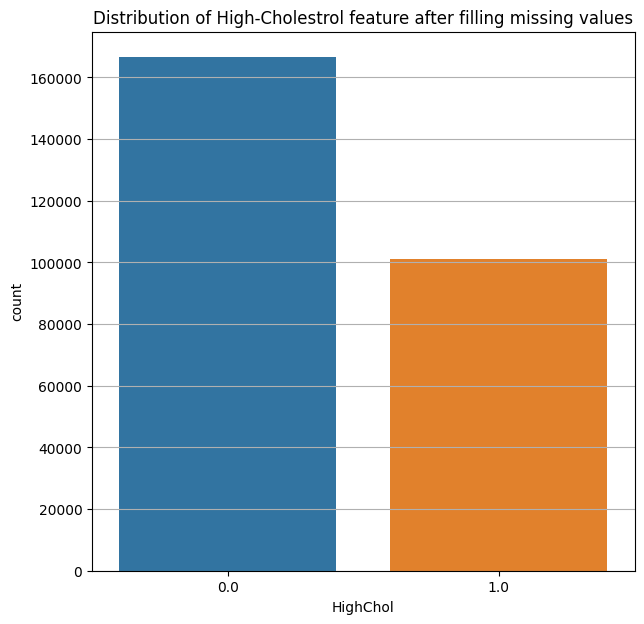

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(data=fully_merged_dataset_copy,x='HighChol').yaxis.grid(True)
plt.title('Distribution of High-Cholestrol feature after filling missing values')
plt.show()

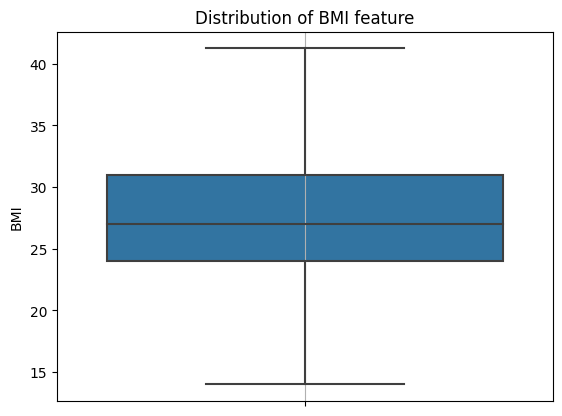

In [26]:
sns.boxplot(data=fully_merged_dataset_copy, y='BMI').xaxis.grid(True)
plt.title('Distribution of BMI feature')
plt.show()

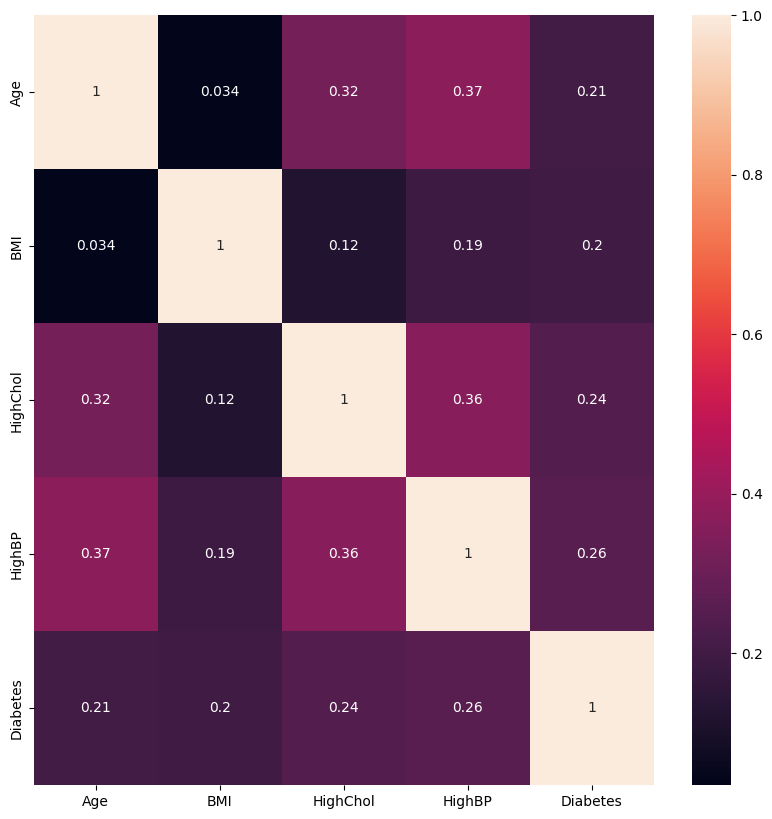

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(fully_merged_dataset_copy.corr(), annot=True)
plt.show()

In [29]:
print('==========Info==========')
print(fully_merged_dataset_copy.info())
print('')
print('==========Check for number of null Values==========')
print(fully_merged_dataset_copy.isnull().sum())
print('')
print('==========Finding no.of Unique values in each column==========')
print(fully_merged_dataset_copy.nunique())
print('')
print('==========Description of dataset==========')
print(fully_merged_dataset_copy.describe())

==========Info==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267744 entries, 0 to 267743
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Age       267744 non-null  int64  
 1   BMI       267744 non-null  float64
 2   HighChol  267744 non-null  float64
 3   HighBP    267744 non-null  int64  
 4   Diabetes  267744 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 10.2 MB
None

==========Check for number of null Values==========
Age         0
BMI         0
HighChol    0
HighBP      0
Diabetes    0
dtype: int64

==========Finding no.of Unique values in each column==========
Age           14
BMI         2648
HighChol       2
HighBP         2
Diabetes       2
dtype: int64

==========Description of dataset==========
                 Age            BMI       HighChol         HighBP  \
count  267744.000000  267744.000000  267744.000000  267744.000000   
mean        7.689397      27.701845       0.37818

In [30]:
fully_merged_dataset_copy.to_csv('FinalMergedDS.csv')